In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import time
import datetime


df=pd.read_csv('Disney - Visitation.csv')

In [2]:
df.head()

,source_id,Passtype,use_time,usage_status_desc
0,4364,Diamond,12/24/19 8:29,Admission Ticket
1,4364,Diamond,12/27/19 7:04,Admission Ticket
2,4372,Gold,12/27/19 17:11,Admission Ticket
3,4373,Gold,12/27/19 17:11,Admission Ticket
4,4376,Gold,12/22/19 14:07,Admission Ticket


In [3]:
df.describe(include=object)

,Passtype,use_time,usage_status_desc
count,24297,24297,24297
unique,3,4011,4
top,Gold,12/22/19 13:22,Admission Ticket
freq,15727,47,19582


In [4]:
df.isnull().sum()

source_id            0
Passtype             0
use_time             0
usage_status_desc    0
dtype: int64

In [5]:
len(df)

24297

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24297 entries, 0 to 24296
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   source_id          24297 non-null  int64 
 1   Passtype           24297 non-null  object
 2   use_time           24297 non-null  object
 3   usage_status_desc  24297 non-null  object
dtypes: int64(1), object(3)
memory usage: 759.4+ KB


In [7]:
date=pd.to_datetime(df['use_time'], utc=False)
df['use_time']=date

df['new_date'] = [d.date() for d in df['use_time']]
df['new_time'] = [d.time() for d in df['use_time']]

In [8]:
df

,source_id,Passtype,use_time,usage_status_desc,new_date,new_time
0,4364,Diamond,2019-12-24 08:29:00,Admission Ticket,2019-12-24,08:29:00
1,4364,Diamond,2019-12-27 07:04:00,Admission Ticket,2019-12-27,07:04:00
2,4372,Gold,2019-12-27 17:11:00,Admission Ticket,2019-12-27,17:11:00
3,4373,Gold,2019-12-27 17:11:00,Admission Ticket,2019-12-27,17:11:00
4,4376,Gold,2019-12-22 14:07:00,Admission Ticket,2019-12-22,14:07:00
...,...,...,...,...,...,...
24292,206901,Gold,2019-12-28 15:02:00,Invalid Ticket,2019-12-28,15:02:00
24293,206920,Silver,2019-12-28 15:59:00,Invalid Ticket,2019-12-28,15:59:00
24294,206922,Silver,2019-12-28 16:13:00,Invalid Ticket,2019-12-28,16:13:00
24295,206923,Silver,2019-12-28 16:13:00,Invalid Ticket,2019-12-28,16:13:00


In [9]:
df.drop(['use_time'],axis=1,inplace=True)  

In [10]:
#unique occurrences based on source_id
df['occurrences'] = df.groupby('source_id')['source_id'].transform('size')


In [11]:
df['usage_status_desc'].value_counts()

Admission Ticket    19582
ReEntry              4633
Invalid Ticket         81
Ticket Blocked          1
Name: usage_status_desc, dtype: int64

# sorting based on usage_status_desc - ADMISSION TICKET


In [14]:
df1=df[df['usage_status_desc']=='Admission Ticket']
df1.head()


,source_id,Passtype,usage_status_desc,new_date,new_time,occurrences
0,4364,Diamond,Admission Ticket,2019-12-24,08:29:00,2
1,4364,Diamond,Admission Ticket,2019-12-27,07:04:00,2
2,4372,Gold,Admission Ticket,2019-12-27,17:11:00,1
3,4373,Gold,Admission Ticket,2019-12-27,17:11:00,1
4,4376,Gold,Admission Ticket,2019-12-22,14:07:00,1


In [25]:
dfa=df1[df1['usage_status_desc']=='Admission Ticket']
dfa['Passtype'].value_counts()

Gold       12729
Silver      3766
Diamond     3087
Name: Passtype, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

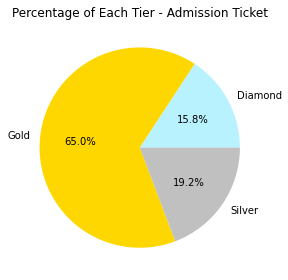

In [26]:
#percentage of each tier
import matplotlib.pyplot as plt
tiers=['Diamond','Gold','Silver']
diam=len(df1[df1['Passtype']=='Diamond'])
gold=len(df1[df1['Passtype']=='Gold'])
silver=len(df1[df1['Passtype']=='Silver'])
data=[diam,gold,silver]
plt.pie(data, labels = tiers,autopct='%1.1f%%',colors = ['#b9f2ff','#FFD700','#C0C0C0'])
plt.title('Percentage of Each Tier - Admission Ticket')
plt.tight_layout()

plt.show

In [16]:
#average number of Admission Ticket occurrences per person (source_id)
df1['occurrences'].mean()

1.9464303952609538

In [63]:
#average number of Admission Ticket occurrences per person per Tier (source_id)
Goldoccurrences=df1.loc[df1['Passtype'] == 'Gold', 'occurrences'].mean()
Diamondoccurrences=df1.loc[df1['Passtype'] == 'Diamond', 'occurrences'].mean()
Silveroccurrences=df1.loc[df1['Passtype'] == 'Silver', 'occurrences'].mean()

print("Average number of Admission Tickets per person for Gold Tier:",Goldoccurrences)
print("Average number of Admission Tickets per person for Diamond Tier:",Diamondoccurrences)
print("Average number of Admission Tickets per person for Silver Tier:",Silveroccurrences)

Average number of Admission Tickets per person for Gold Tier: 1.4687720952156493
Average number of Admission Tickets per person for Diamond Tier: 4.835114998380305
Average number of Admission Tickets per person for Silver Tier: 1.1930430164630907


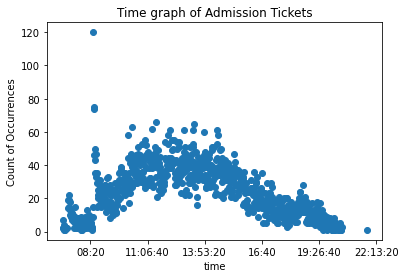

In [17]:
#Popular times for Overall Admission Ticket usage
pd.plotting.register_matplotlib_converters()
x=df1['new_time'].value_counts().index
y=df1['new_time'].value_counts()

plt.scatter(x,y)
plt.title('Time graph of Admission Tickets')
plt.ylabel('Count of Occurrences')
plt.show()

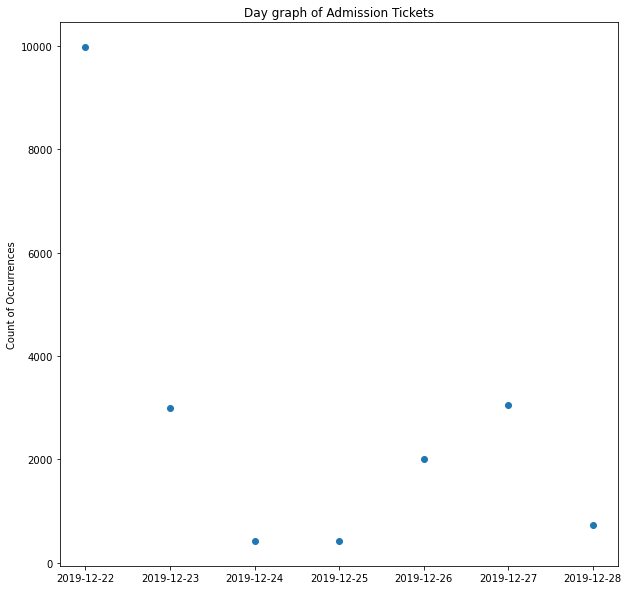

In [18]:
#Popular days for Overall Admission Ticket usage
x=df1['new_date'].value_counts().index
y=df1['new_date'].value_counts()

plt.scatter(x,y)
plt.title('Day graph of Admission Tickets')
plt.ylabel('Count of Occurrences')
plt.gcf().set_size_inches((10, 10))    
plt.show()

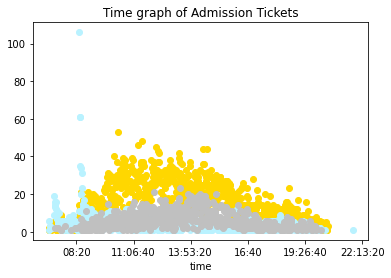

In [22]:
#Popular Times for each type of Admission Ticket Usage
df_part_group=df1.groupby('Passtype')
gold=df_part_group.get_group('Gold')
diamond=df_part_group.get_group('Diamond')
silver=df_part_group.get_group('Silver')



goldy=gold['new_time'].value_counts()
diamondy=diamond['new_time'].value_counts()
silvery=silver['new_time'].value_counts()

ax = plt.gca()

goldx=gold['new_time'].value_counts().index
diamondx=diamond['new_time'].value_counts().index
silverx=silver['new_time'].value_counts().index



ax.scatter(goldx, goldy, color='#FFD700')
ax.scatter(diamondx, diamondy, color='#b9f2ff')
ax.scatter(silverx, silvery, color='#C0C0C0')

ax.title.set_text('Time graph of Admission Tickets')





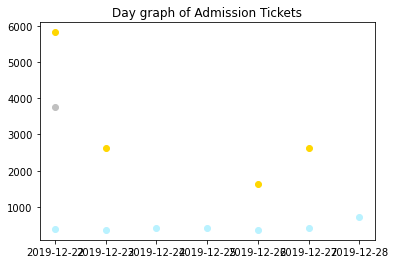

In [20]:
#Popular Day for each type of Admission Ticket Usage
df_part_group=df1.groupby('Passtype')
gold=df_part_group.get_group('Gold')
diamond=df_part_group.get_group('Diamond')
silver=df_part_group.get_group('Silver')



goldy=gold['new_date'].value_counts()
diamondy=diamond['new_date'].value_counts()
silvery=silver['new_date'].value_counts()

ax = plt.gca()

goldx=gold['new_date'].value_counts().index
diamondx=diamond['new_date'].value_counts().index
silverx=silver['new_date'].value_counts().index



ax.scatter(goldx, goldy, color='#FFD700')
ax.scatter(diamondx, diamondy, color='#b9f2ff')
ax.scatter(silverx, silvery, color='#C0C0C0')

ax.title.set_text('Day graph of Admission Tickets')

# sorting based on usage_status_desc - ReEntry



In [27]:
df2=df[df['usage_status_desc']=='ReEntry']
df2.head()

,source_id,Passtype,usage_status_desc,new_date,new_time,occurrences
24,4434,Silver,ReEntry,2019-12-22,12:57:00,3
25,4434,Silver,ReEntry,2019-12-22,18:54:00,3
39,4531,Gold,ReEntry,2019-12-27,20:31:00,2
41,4535,Diamond,ReEntry,2019-12-23,16:41:00,7
43,4535,Diamond,ReEntry,2019-12-24,12:05:00,7


In [28]:
dfb=df2[df2['usage_status_desc']=='ReEntry']
dfb['Passtype'].value_counts()

Gold       2930
Diamond     972
Silver      731
Name: Passtype, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

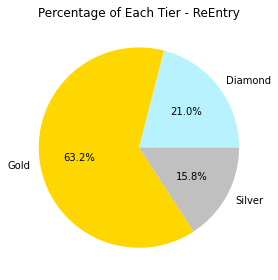

In [29]:
#percentage of each tier
import matplotlib.pyplot as plt
tiers=['Diamond','Gold','Silver']
diam=len(df2[df2['Passtype']=='Diamond'])
gold=len(df2[df2['Passtype']=='Gold'])
silver=len(df2[df2['Passtype']=='Silver'])
data=[diam,gold,silver]
plt.pie(data, labels = tiers,autopct='%1.1f%%',colors = ['#b9f2ff','#FFD700','#C0C0C0'])
plt.title('Percentage of Each Tier - ReEntry')
plt.tight_layout()

plt.show

In [30]:
#average number of ReEntry occurrences per person (source_id)
df2['occurrences'].mean()

3.468163177206993

In [65]:
#average number of ReEntry occurrences per person per Tier (source_id)
Goldoccurrences=df2.loc[df2['Passtype'] == 'Gold', 'occurrences'].mean()
Diamondoccurrences=df2.loc[df2['Passtype'] == 'Diamond', 'occurrences'].mean()
Silveroccurrences=df2.loc[df2['Passtype'] == 'Silver', 'occurrences'].mean()

print("Average number of ReEntry per person for Gold Tier:",Goldoccurrences)
print("Average number of ReEntry Tickets per person for Diamond Tier:",Diamondoccurrences)
print("Average number of ReEntry Tickets per person for Silver Tier:",Silveroccurrences)

Average number of ReEntry per person for Gold Tier: 2.496928327645051
Average number of ReEntry Tickets per person for Diamond Tier: 7.403292181069959
Average number of ReEntry Tickets per person for Silver Tier: 2.1285909712722297


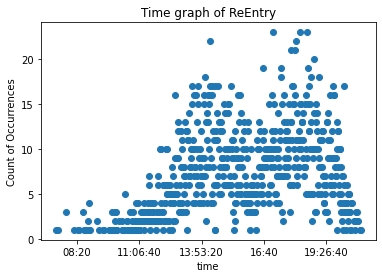

In [32]:
#Popular times for Overall ReEntry usage
pd.plotting.register_matplotlib_converters()
x=df2['new_time'].value_counts().index
y=df2['new_time'].value_counts()

plt.scatter(x,y)
plt.title('Time graph of ReEntry')
plt.ylabel('Count of Occurrences')
plt.show()

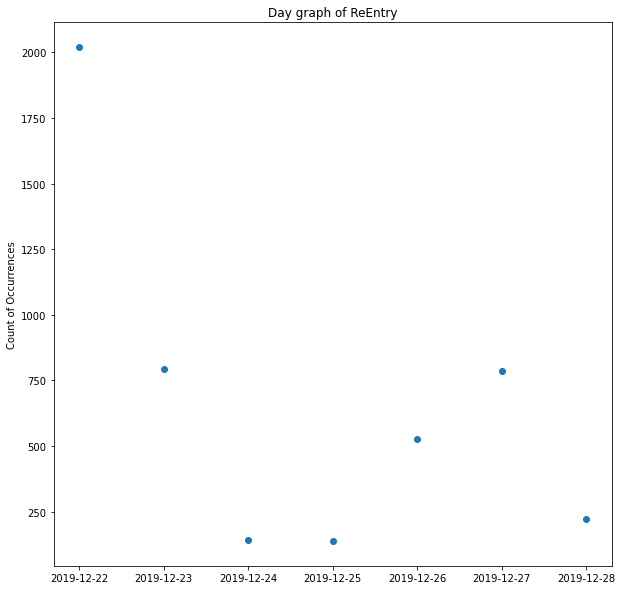

In [34]:
#Popular days for Overall ReEntry usage
x=df2['new_date'].value_counts().index
y=df2['new_date'].value_counts()

plt.scatter(x,y)
plt.title('Day graph of ReEntry')
plt.ylabel('Count of Occurrences')
plt.gcf().set_size_inches((10, 10))    
plt.show()

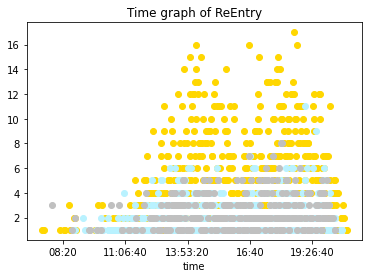

In [35]:
#Popular Times for each type of ReEntry Usage
df_part_group=df2.groupby('Passtype')
gold=df_part_group.get_group('Gold')
diamond=df_part_group.get_group('Diamond')
silver=df_part_group.get_group('Silver')



goldy=gold['new_time'].value_counts()
diamondy=diamond['new_time'].value_counts()
silvery=silver['new_time'].value_counts()

ax = plt.gca()

goldx=gold['new_time'].value_counts().index
diamondx=diamond['new_time'].value_counts().index
silverx=silver['new_time'].value_counts().index



ax.scatter(goldx, goldy, color='#FFD700')
ax.scatter(diamondx, diamondy, color='#b9f2ff')
ax.scatter(silverx, silvery, color='#C0C0C0')

ax.title.set_text('Time graph of ReEntry')

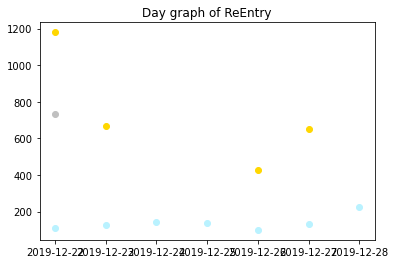

In [36]:
#Popular Day for each type of ReEntry Usage
df_part_group=df2.groupby('Passtype')
gold=df_part_group.get_group('Gold')
diamond=df_part_group.get_group('Diamond')
silver=df_part_group.get_group('Silver')



goldy=gold['new_date'].value_counts()
diamondy=diamond['new_date'].value_counts()
silvery=silver['new_date'].value_counts()

ax = plt.gca()

goldx=gold['new_date'].value_counts().index
diamondx=diamond['new_date'].value_counts().index
silverx=silver['new_date'].value_counts().index



ax.scatter(goldx, goldy, color='#FFD700')
ax.scatter(diamondx, diamondy, color='#b9f2ff')
ax.scatter(silverx, silvery, color='#C0C0C0')

ax.title.set_text('Day graph of ReEntry')

# sorting based on usage_status_desc - Invalid Ticket

In [37]:
df3=df[df['usage_status_desc']=='Invalid Ticket']
df3.head()

,source_id,Passtype,usage_status_desc,new_date,new_time,occurrences
819,9798,Gold,Invalid Ticket,2019-12-25,10:34:00,1
1139,12086,Gold,Invalid Ticket,2019-12-24,10:10:00,1
1158,12180,Silver,Invalid Ticket,2019-12-28,13:54:00,1
1159,12181,Silver,Invalid Ticket,2019-12-28,13:54:00,1
1309,12914,Gold,Invalid Ticket,2019-12-24,15:55:00,2


In [39]:
dfc=df3[df3['usage_status_desc']=='Invalid Ticket']
dfc['Passtype'].value_counts()

Gold      68
Silver    13
Name: Passtype, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

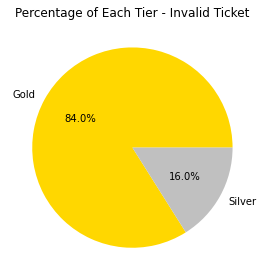

In [43]:
#percentage of each tier
import matplotlib.pyplot as plt
tiers=['Gold','Silver']
gold=len(df3[df3['Passtype']=='Gold'])
silver=len(df3[df3['Passtype']=='Silver'])
data=[gold,silver]
plt.pie(data, labels = tiers,autopct='%1.1f%%',colors = ['#FFD700','#C0C0C0'])
plt.title('Percentage of Each Tier - Invalid Ticket')
plt.tight_layout()

plt.show

In [44]:
#average number of Invalid Ticket occurrences per person (source_id)
df3['occurrences'].mean()

1.345679012345679

In [66]:
#average number of Invalid Ticket occurrences per person per Tier (source_id)
Goldoccurrences=df3.loc[df3['Passtype'] == 'Gold', 'occurrences'].mean()
Diamondoccurrences=df3.loc[df3['Passtype'] == 'Diamond', 'occurrences'].mean()
Silveroccurrences=df3.loc[df3['Passtype'] == 'Silver', 'occurrences'].mean()

print("Average number of Invalid Tickets per person for Gold Tier:",Goldoccurrences)
print("Average number of Invalid Tickets per person for Diamond Tier:",Diamondoccurrences)
print("Average number of Invalid Tickets per person for Silver Tier:",Silveroccurrences)

Average number of Invalid Tickets per person for Gold Tier: 1.3823529411764706
Average number of Invalid Tickets per person for Diamond Tier: nan
Average number of Invalid Tickets per person for Silver Tier: 1.1538461538461537


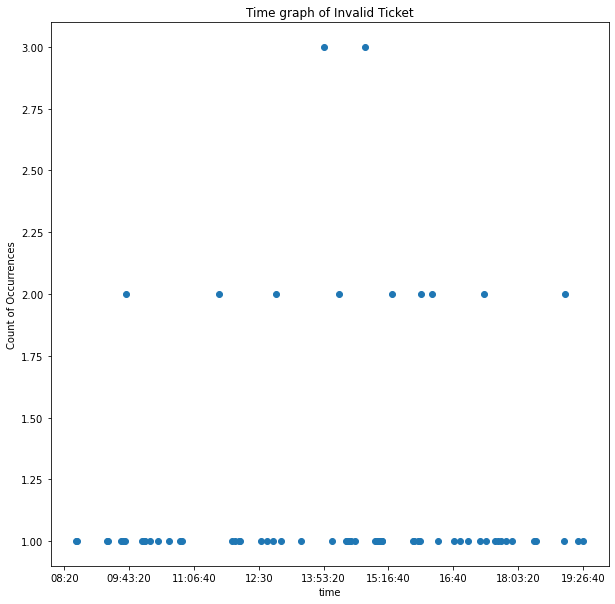

In [47]:
#Popular times for Overall Invalid Ticket usage
pd.plotting.register_matplotlib_converters()
x=df3['new_time'].value_counts().index
y=df3['new_time'].value_counts()

plt.scatter(x,y)
plt.title('Time graph of Invalid Ticket')
plt.ylabel('Count of Occurrences')
plt.gcf().set_size_inches((10, 10))    
plt.show()

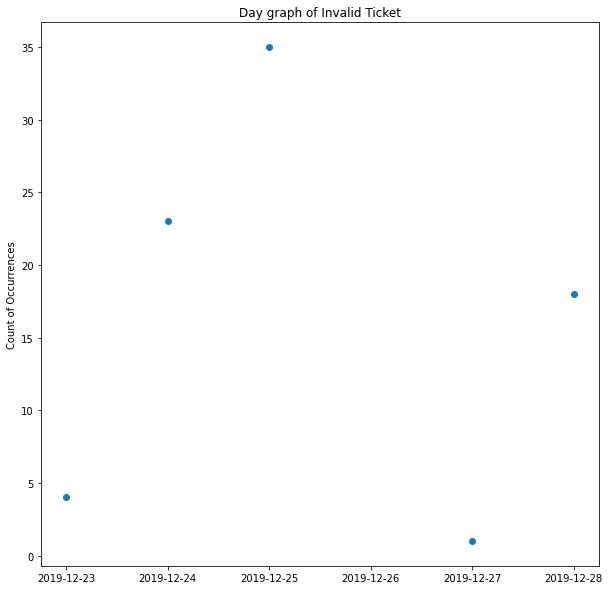

In [48]:
#Popular days for Overall Invalid Ticket usage
x=df3['new_date'].value_counts().index
y=df3['new_date'].value_counts()

plt.scatter(x,y)
plt.title('Day graph of Invalid Ticket')
plt.ylabel('Count of Occurrences')
plt.gcf().set_size_inches((10, 10))    
plt.show()

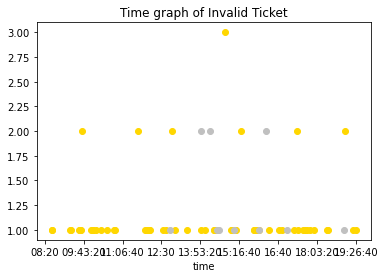

In [49]:
#Popular Times for each type of Invalid Ticket Usage
df_part_group=df3.groupby('Passtype')
gold=df_part_group.get_group('Gold')
silver=df_part_group.get_group('Silver')



goldy=gold['new_time'].value_counts()
silvery=silver['new_time'].value_counts()

ax = plt.gca()

goldx=gold['new_time'].value_counts().index
silverx=silver['new_time'].value_counts().index



ax.scatter(goldx, goldy, color='#FFD700')
ax.scatter(silverx, silvery, color='#C0C0C0')

ax.title.set_text('Time graph of Invalid Ticket')

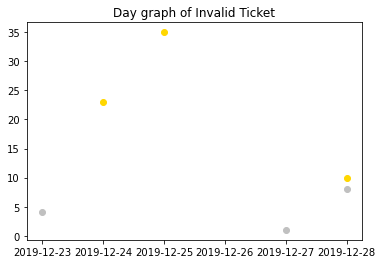

In [50]:
#Popular Day for each type of Invalid Ticket Usage
df_part_group=df3.groupby('Passtype')
gold=df_part_group.get_group('Gold')
silver=df_part_group.get_group('Silver')



goldy=gold['new_date'].value_counts()
silvery=silver['new_date'].value_counts()

ax = plt.gca()

goldx=gold['new_date'].value_counts().index
silverx=silver['new_date'].value_counts().index



ax.scatter(goldx, goldy, color='#FFD700')
ax.scatter(silverx, silvery, color='#C0C0C0')

ax.title.set_text('Day graph of Invalid Ticket')

# sorting based on usage_status_desc - Ticket Blocked

In [51]:
#sorting based on usage_status_desc = TICKET BLOCKED
df4=df[df['usage_status_desc']=='Ticket Blocked']
df4['Passtype'].value_counts()

Diamond    1
Name: Passtype, dtype: int64

In [53]:
df4

,source_id,Passtype,usage_status_desc,new_date,new_time,occurrences
2503,19349,Diamond,Ticket Blocked,2019-12-24,17:25:00,1
